# K-means

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

DATA_PATH='data/'

In [ ]:
X, _ = make_blobs (n_samples=300, centers=3, cluster_std=0.6, random_state=42)

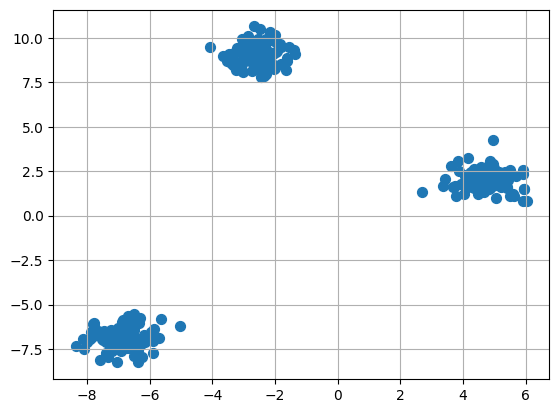

In [12]:
plt.scatter(X[:,0], X [:,1], s=50)
plt.grid()
plt.show()


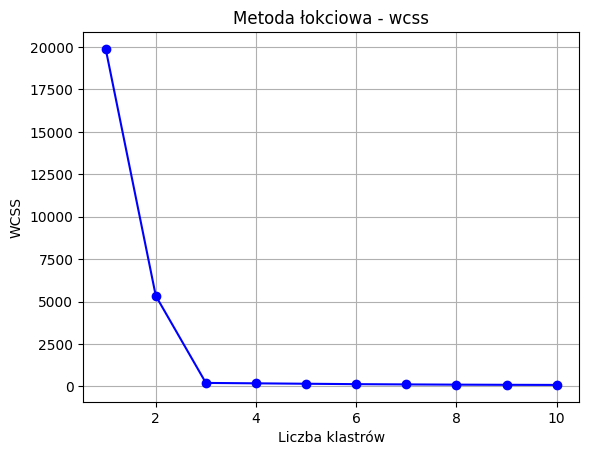

In [7]:
# metoda łokciowa

wcss = []
K_range = range(1,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, marker = "o", linestyle = "-", color = "b")
plt.xlabel('Liczba klastrów')
plt.ylabel('WCSS')
plt.title('Metoda łokciowa - wcss')
plt.grid()
plt.show()

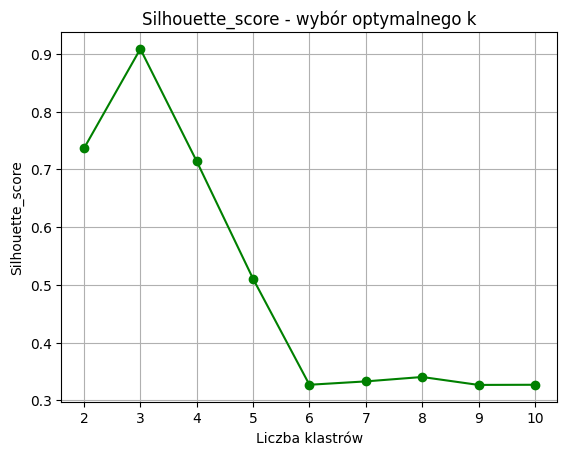

In [ ]:
# shilhouette score

silhouette_scores = []

for k in K_range:
    if k == 1:
        silhouette_scores.append(np.nan) # nie da sie policzyc wartosci dla jednego klastra
    else:
        kmeans = KMeans(n_clusters = k, random_state = 42)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)

plt.plot(K_range, silhouette_scores, marker = "o", linestyle = "-", color = "g")
plt.xlabel('Liczba klastrów')
plt.ylabel('Silhouette_score')
plt.title('Silhouette_score - wybór optymalnego k')
plt.grid()
plt.show()

# im wyższy wynik (blisko 1) to lepsze doopasowanie

### Ostateczna klasteryzacja

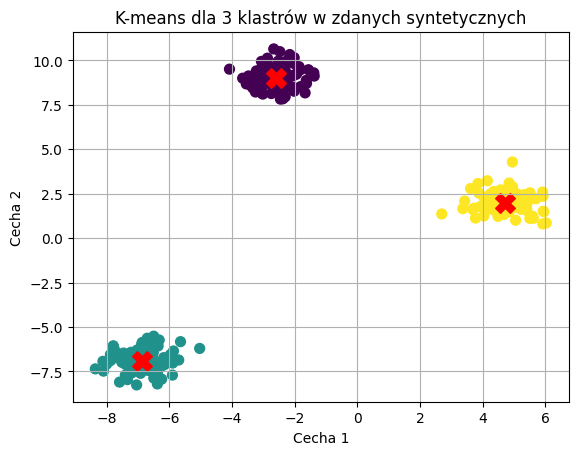

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

plt.scatter(X[:,0], X [:,1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=200, marker='X', label = 'Centroids')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.title('K-means dla 3 klastrów w zdanych syntetycznych')
plt.legend
plt.grid(True)
plt.show()

### Segmentacja klientow przy pomocy k-means

In [20]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os

In [29]:
df = pd.read_csv(os.path.join(DATA_PATH, 'Mall_Customers.csv'))

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
features = df [['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

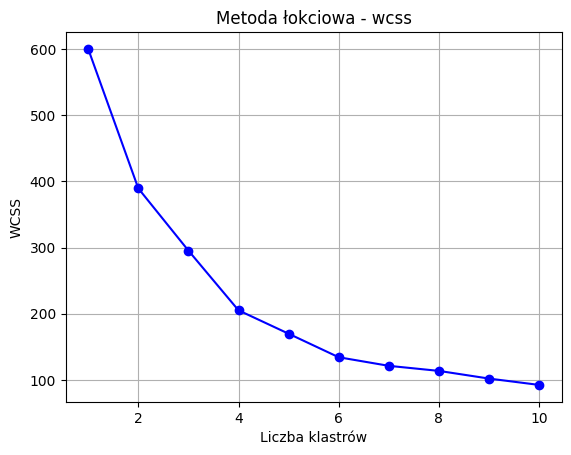

In [37]:
# metoda łokciowa

wcss = []


for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, marker = "o", linestyle = "-", color = "b")
plt.xlabel('Liczba klastrów')
plt.ylabel('WCSS')
plt.title('Metoda łokciowa - wcss')
plt.grid()
plt.show()

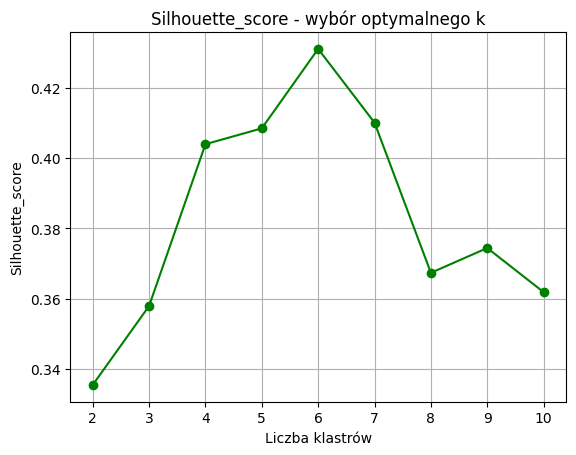

In [38]:
# shilhouette score

silhouette_scores = []

for k in K_range:
    if k == 1:
        silhouette_scores.append(np.nan) # nie da sie policzyc wartosci dla jednego klastra
    else:
        kmeans = KMeans(n_clusters = k, random_state = 42)
        labels = kmeans.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        silhouette_scores.append(score)

plt.plot(K_range, silhouette_scores, marker = "o", linestyle = "-", color = "g")
plt.xlabel('Liczba klastrów')
plt.ylabel('Silhouette_score')
plt.title('Silhouette_score - wybór optymalnego k')
plt.grid()
plt.show()

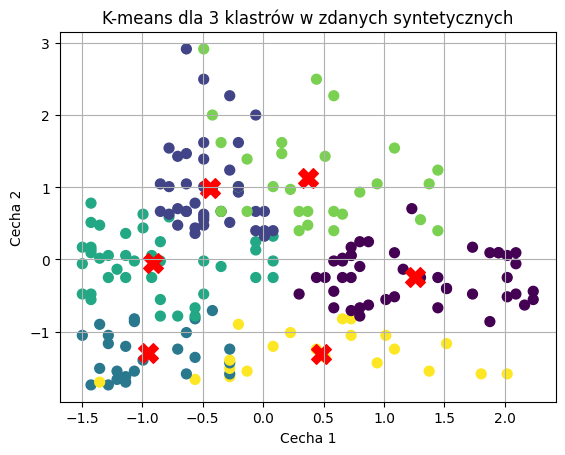

In [ ]:
# ostateczny model k-means

kmeans = KMeans(n_clusters=6, random_state=42)

df["Cluster"] = kmeans.fit_predict(X_scaled) # przypisanie kazdemu obiektowi etykiety w postaci dopasowanego klastra
centroids = kmeans.cluster_centers_

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df["Cluster"], cmap='viridis', s=50)
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=200, marker='X', label = 'Centroids')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.title('K-means dla 6 klastrów w danych klientow')
plt.legend
plt.grid(True)
plt.show()

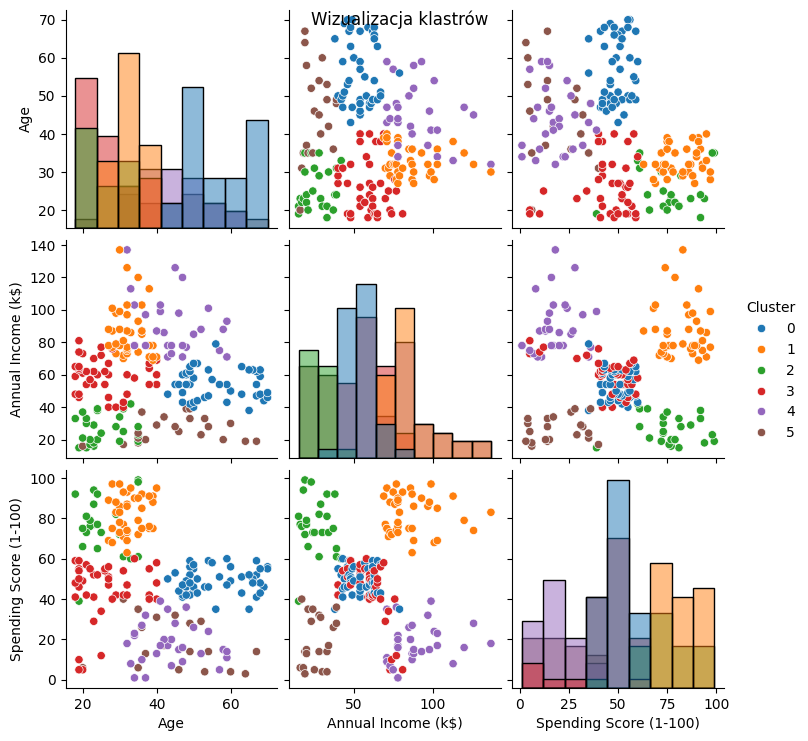

In [47]:
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue = 'Cluster', palette='tab10', diag_kind='hist')
plt.suptitle('Wizualizacja klastrów')
plt.show()

In [58]:
# nadanie klastro etykiet

segment_labels={
    0: 'oszczedni',
    1: 'VIP',
    2: 'lowcy okazji',
    3: 'stabilni',
    4: 'nieaktywni - bardzo',
    5: 'niekatywni'
}

df['Segment'] = df['Cluster'].map(segment_labels)

df.head()



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,Segment
0,1,Male,19,15,39,2,lowcy okazji
1,2,Male,21,15,81,2,lowcy okazji
2,3,Female,20,16,6,5,niekatywni
3,4,Female,23,16,77,2,lowcy okazji
4,5,Female,31,17,40,5,niekatywni


In [59]:
# który segment generuje najwieksze zyski
# ktory segment potrzebuje kampani marketingowej
# komu warto zaproponowac program lojalnosciowy

summary = df.groupby('Segment')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

summary['Liczba klientów'] = df['Segment'].value_counts()
summary = summary[['Liczba klientów','Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
summary = summary.sort_values(by='Spending Score (1-100)', ascending=False)

print("Podsumowanie segmentu klientów: ")
print(summary)

Podsumowanie segmentu klientów: 
                     Liczba klientów        Age  Annual Income (k$)  \
Segment                                                               
VIP                               39  32.692308           86.538462   
lowcy okazji                      25  25.560000           26.480000   
oszczedni                         45  56.333333           54.266667   
stabilni                          40  26.125000           59.425000   
niekatywni                        21  45.523810           26.285714   
nieaktywni - bardzo               30  44.000000           90.133333   

                     Spending Score (1-100)  
Segment                                      
VIP                               82.128205  
lowcy okazji                      76.240000  
oszczedni                         49.066667  
stabilni                          44.450000  
niekatywni                        19.380952  
nieaktywni - bardzo               17.933333  


In [61]:
# rekomendacje biznesowe

print("Rekomendacje: ")

for segment, row in summary.iterrows(): # przechodzimy bo summary
    if row['Spending Score (1-100)'] > 70:
        print(f"{segment}: bardzo wartościowi klienci")
    elif row['Spending Score (1-100)'] < 30:
        print(f"{segment}: niska atywność, kampania promocyjna")
    else:
        print(f"{segment}: umiarkowana atywność, oferta lojalnosciowa")

Rekomendacje: 
VIP: bardzo wartościowi klienci
lowcy okazji: bardzo wartościowi klienci
oszczedni: umiarkowana atywność, oferta lojalnosciowa
stabilni: umiarkowana atywność, oferta lojalnosciowa
niekatywni: niska atywność, kampania promocyjna
nieaktywni - bardzo: niska atywność, kampania promocyjna


### Segmentacja k-means na iris

In [134]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, adjusted_rand_score, normalized_mutual_info_score
from scipy.stats import mode

#adjusted_rand_score - porownije prawdopodobienstow z klasteryzacji np przewidziane etykiety do etykiet prwawdziwych
# normalized_mutual_info_score - ocena klasteryacji, mierzy ilosc wspolnej informacji miedzy etykietami przewidzianymi a rzeczywistymi
# 0 -1 (0- brak wspolnej informacji, 1 - pelna zgodnosc 

In [135]:
iris = load_iris()
X = iris.data
y= iris.target

In [152]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)


def map_clusters_to_labels(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for cluster in np.unique(y_pred):
        mask = (y_pred == cluster)  # tworzymy maske logiczna
        majority_label = mode(y_true[mask], keepdims=True).mode[0]  # bierzemy prawdziwe etykiety punkow nalezacych do danego klastra
        # wybieramy najczesciej wystepujaca etykiete - glosowanie
        labels[mask] = majority_label  # przypisujemy nową etykiete w danym klastrze
    return labels


y_mapped = map_clusters_to_labels(y, y_pred)

accuracy = accuracy_score(y, y_mapped)
ari = adjusted_rand_score(y, y_mapped)
nmi = normalized_mutual_info_score(y, y_mapped)

print(f"Dokladnosc: {accuracy * 100:2f}%")
print(f"ARI: {ari * 100:2f}%")
print(f"NMI: {nmi * 100:2f}%")

print("Macierz pomyłek zrbioru iris")
print(
    pd.crosstab(
        y, y_mapped, rownames=["Prawdziwe etykiety"], colnames=["Etykiety Przewidziane"]
    )
)

Dokladnosc: 68.539326%
ARI: 43.121289%
NMI: 43.018149%
Macierz pomyłek zrbioru iris
Etykiety Przewidziane   0   1
Prawdziwe etykiety           
0                      58   1
1                       7  64
2                      11  37


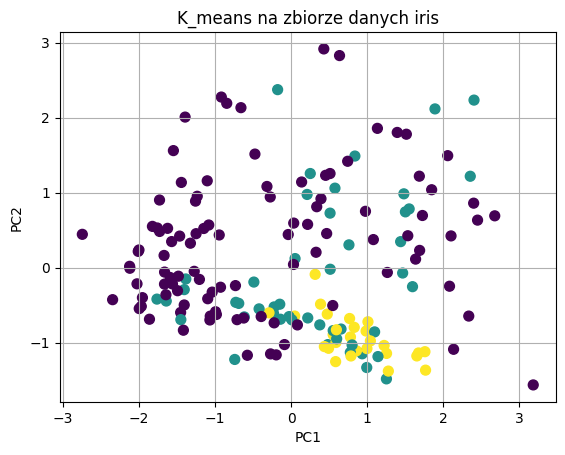

In [153]:
# wizualizacja

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred, cmap='viridis', s=50)
plt.title('K_means na zbiorze danych iris')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

### Segmentacja K-means na datasecie win

In [154]:
from sklearn.datasets import load_wine

wine = load_wine()

y = wine.target

X = pd.DataFrame(wine.data, columns=wine.feature_names)
X.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [155]:
features = df [['alcohol', 'malic_acid', 'color_intensity']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)



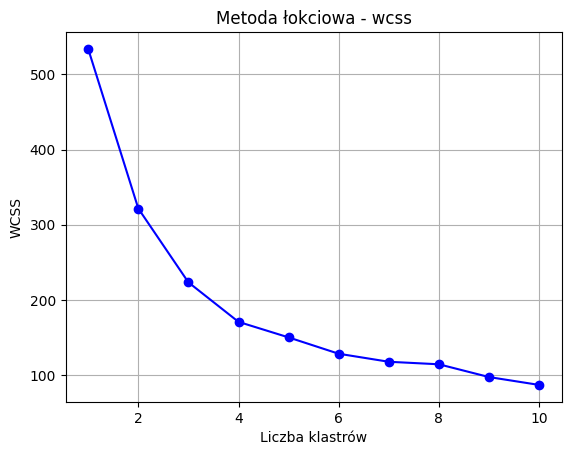

In [156]:
# metoda łokciowa

wcss = []


for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, marker = "o", linestyle = "-", color = "b")
plt.xlabel('Liczba klastrów')
plt.ylabel('WCSS')
plt.title('Metoda łokciowa - wcss')
plt.grid()
plt.show()

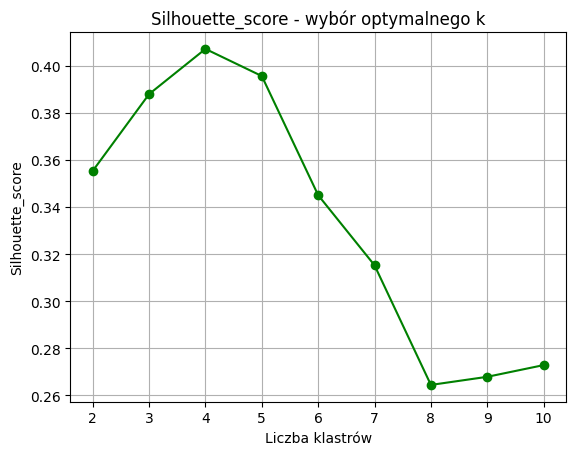

In [157]:
# shilhouette score

silhouette_scores = []

for k in K_range:
    if k == 1:
        silhouette_scores.append(np.nan) # nie da sie policzyc wartosci dla jednego klastra
    else:
        kmeans = KMeans(n_clusters = k, random_state = 42)
        labels = kmeans.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        silhouette_scores.append(score)

plt.plot(K_range, silhouette_scores, marker = "o", linestyle = "-", color = "g")
plt.xlabel('Liczba klastrów')
plt.ylabel('Silhouette_score')
plt.title('Silhouette_score - wybór optymalnego k')
plt.grid()
plt.show()

In [158]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)


def map_clusters_to_labels(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for cluster in np.unique(y_pred):
        mask = (y_pred == cluster)  # tworzymy maske logiczna
        majority_label = mode(y_true[mask], keepdims=True).mode[0]  # bierzemy prawdziwe etykiety punkow nalezacych do danego klastra
        # wybieramy najczesciej wystepujaca etykiete - glosowanie
        labels[mask] = majority_label  # przypisujemy nową etykiete w danym klastrze
    return labels


y_mapped = map_clusters_to_labels(y, y_pred)

accuracy = accuracy_score(y, y_mapped)
ari = adjusted_rand_score(y, y_mapped)
nmi = normalized_mutual_info_score(y, y_mapped)

print(f"Dokladnosc: {accuracy * 100:2f}%")
print(f"ARI: {ari * 100:2f}%")
print(f"NMI: {nmi * 100:2f}%")

print("\nMacierz pomyłek zbioru wine")
print(
    pd.crosstab(
        y, y_mapped, rownames=["Prawdziwe etykiety"], colnames=["Etykiety Przewidziane"]
    )
)

Dokladnosc: 79.213483%
ARI: 50.138357%
NMI: 43.649730%

Macierz pomyłek zbioru wine
Etykiety Przewidziane   0   1   2
Prawdziwe etykiety               
0                      48   4   7
1                       4  60   7
2                      13   2  33


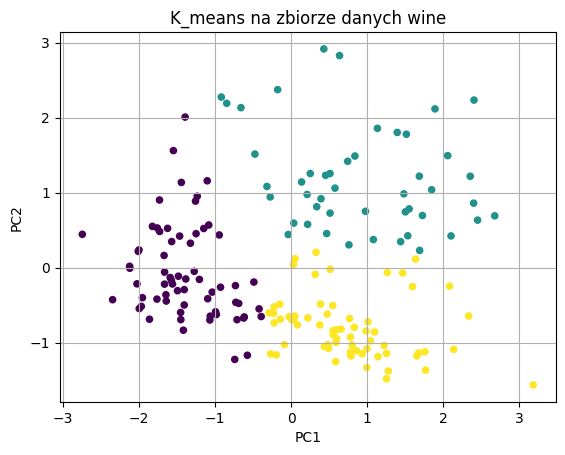

In [159]:
# wizualizacja

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred, cmap='viridis', s=20)
plt.title('K_means na zbiorze danych wine')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()